# ASD

AlloSteric Database (ASD) provides a platform for exhaustive information on allosteric proteins and their modulators. The database now contains 2,422 allosteric proteins from 425 species and 100,320 modulators in three categories (activators, inhibitors, and regulators). 

![image](http://mdl.shsmu.edu.cn/ASD/css/images/help/document/framework.png)


ASD: a comprehensive database of allosteric proteins and modulators. Nucleic Acids Res. 2011 Jan;39



[Download page](http://mdl.shsmu.edu.cn/ASD/module/download/download.jsp?tabIndex=1)

## Install software and tools.

In [1]:
!pip install ASDParser seaborn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from asdparser.asd import AsdDB

db_directory='/Users/pegerto.fernandez/brunel/ASD/ASD_Release_201909_XF'
db = AsdDB(db_directory)

/Users/pegerto.fernandez/brunel/ml/lib/python3.10/site-packages/asdparser/model.py:24: UserWarning: invalid site: Chain T: DA705, DC706
  warnings.warn(f'invalid site: {site}')
/Users/pegerto.fernandez/brunel/ml/lib/python3.10/site-packages/asdparser/model.py:24: UserWarning: invalid site: Chain G:  C1,  C2
  warnings.warn(f'invalid site: {site}')
/Users/pegerto.fernandez/brunel/ml/lib/python3.10/site-packages/asdparser/model.py:24: UserWarning: invalid site: Chain A:ARG198,ALA1,ARG0,ASN199,GLY-1,ARG123,LYS122,GLU118,LYS176,ASP3,PRO2,LYS119
  warnings.warn(f'invalid site: {site}')
/Users/pegerto.fernandez/brunel/ml/lib/python3.10/site-packages/asdparser/model.py:24: UserWarning: invalid site: Chain A:ARG198,ALA1,ILE171,ARG0,ALA120,GLY-1,ARG123,SER4,LYS122,GLU118,ASN199,LYS176,ASP3,PRO2,LYS119,TYR169
  warnings.warn(f'invalid site: {site}')
/Users/pegerto.fernandez/brunel/ml/lib/python3.10/site-packages/asdparser/model.py:24: UserWarning: invalid site: Chain A:TRP-3,ARG198,ALA1,ARG0,ASN

## Review the distribution of residues

In [3]:
def parse_residue_type(site):
    if ';' in site:
        split = site.split(';',1)
        return parse_residue_type(split[0]) +   parse_residue_type(split[1])
    _ , residues_str = site.split(':')
    residues = residues_str.split(',')
    return list(map(lambda x: x[0:3],residues))
    

allosteric_sites = [site.site_residues for p in db.proteins.values() for site in p.allosteric_sites]
residues = [r for site in allosteric_sites for r in parse_residue_type(site)]

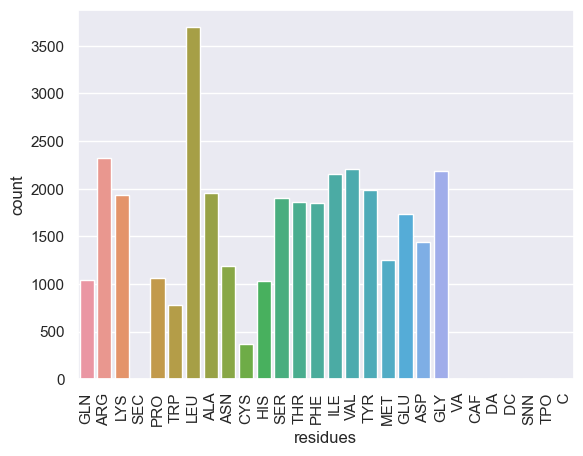

In [4]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({"residues": residues})

sns.set(style="darkgrid")
ax = sns.countplot(x="residues", data=df)
ax.tick_params(axis='x', rotation=90)